## Direct file system access to the CEDA Archive ##

Read-only access to Group workspaces also possible as well as read/write to `/home`. Read/write access to GWSs may follow at a later date

In [13]:
%%time
!ls /neodc

aast_leicester	    glas_veg_height		      modis
aatsr_lst	    global_gas_flaring		      mtci
aatsr_multimission  globalbedo_broadband_brdf	      ncaveo_field
arc		    globalbedo_modis_spectral_priors  ncaveo_lcm2000
ard4ceos	    globolakes			      nceo-carbon
arsf		    gome-2			      nceo-cryosphere
atsrubt		    gome2_metop_a		      nceo_biomass_maps
avhrr-3		    gome2_metop_b		      nextmap
avhrr3_metop_a	    gosat			      qa4ecv
avhrr3_metop_b	    hycristal			      requests
avhrr3_metop_c	    iasi			      sciamachy
avhrr_dundee	    iasi_ch4_ral		      seawifs
avhrr_fasir	    iasi_metop_a		      sentinel1a
avhrr_gac	    iasi_metop_b		      sentinel1b
baci_ssv	    iasi_so2_oxford		      sentinel2a
c3s_sst		    isar			      sentinel2b
caliop		    landmap			      sentinel3a
casix		    landsat45tm			      sentinel3b
comet		    landsat5			      sentinel5p
comet-cgps	    landsat7etm			      sentinel_ard
cryosat_2	    landsat8			      seviri_frp
czcs		    lsasaf			      shac2000
esa_globsnow

## Load an ESACCI Sea Surface Temperature data set

In [14]:
%%time
import netCDF4
data = netCDF4.Dataset('/neodc/esacci/sst/data/lt/Analysis/L4/v01.1/1991/09/01/19910901120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_LT-v02.0-fv01.1.nc')

CPU times: user 7.59 ms, sys: 10.7 ms, total: 18.3 ms
Wall time: 27.3 ms


In [15]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: ESA SST CCI OSTIA L4 product
    references: http://www.esa-sst-cci.org
    institution: ESACCI
    history: Created using OSTIA reanalysis system v2.0
    license: GHRSST protocol describes data use as free and open
    naming_authority: org.ghrsst
    uuid: 19b1f7a4-d8d1-44eb-9cfa-37cc33c4c2c1
    tracking_id: 19b1f7a4-d8d1-44eb-9cfa-37cc33c4c2c1
    gds_version_id: 2.0
    netcdf_version_id: 4.1.3
    file_quality_level: 3
    spatial_resolution: 0.05 degree
    date_created: 20130429T221012Z
    start_time: 19910901T000000Z
    time_coverage_start: 19910901T000000Z
    stop_time: 19910901T235959Z
    time_coverage_end: 19910901T235959Z
    time_coverage_duration: P1D
    time_coverage_resolution: P1D
    metadata_link: http://www.esa-cci.org
    keywords: Oceans > Ocean Temperature > Sea Surface Temperature
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Scie

## Prepare SST variable for plotting ##

In [16]:
%%time
lat = data['lat'][:]
lon = data['lon'][:]
var = data['analysed_sst'][0,:,:]

CPU times: user 865 ms, sys: 176 ms, total: 1.04 s
Wall time: 1.04 s


Load plotting libraries - Cartopy in this case

In [17]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

## Plot the SST data on world map ##

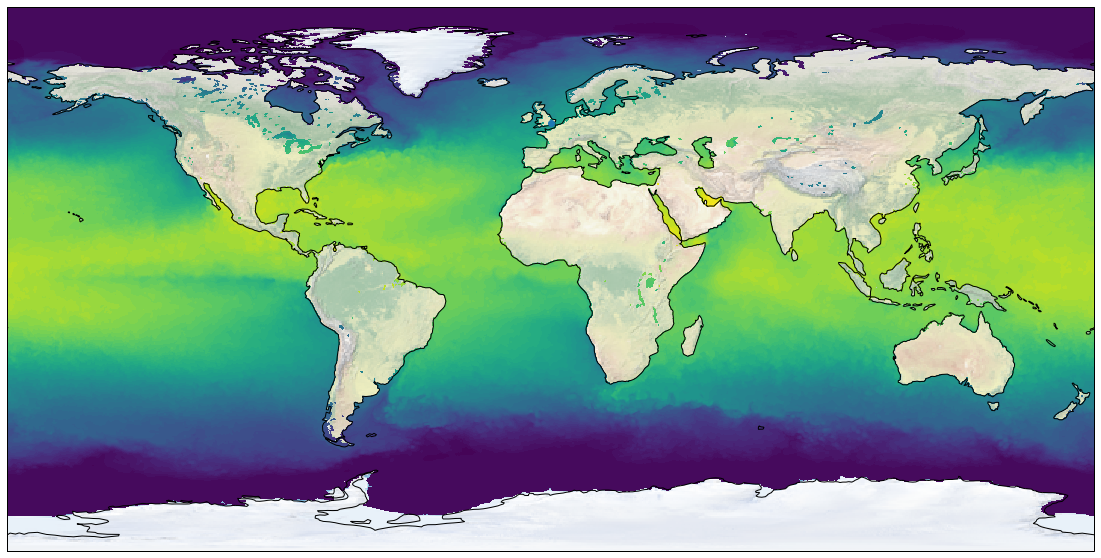

CPU times: user 23.7 s, sys: 1.3 s, total: 25 s
Wall time: 24.5 s


In [18]:
%%time
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_global()
ax.stock_img()

ax.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
plt.contourf(lon, lat, var, 60, transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()